# Logistic regression

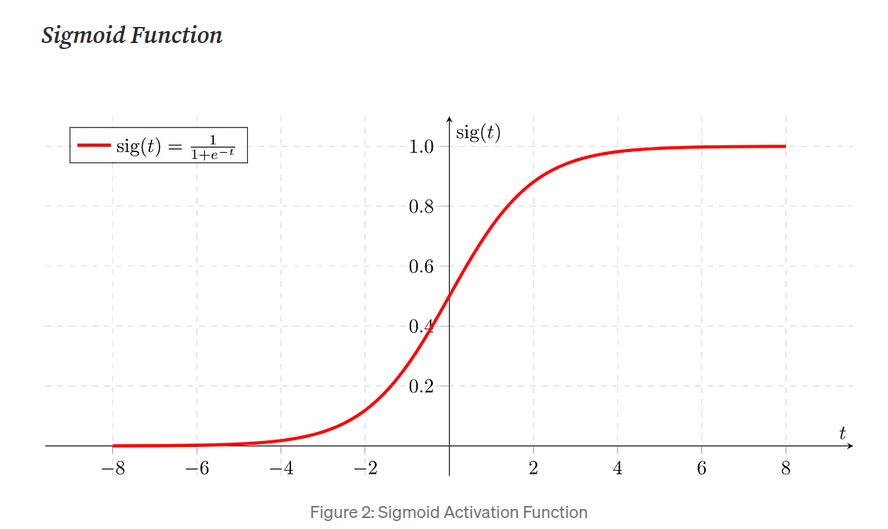


https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

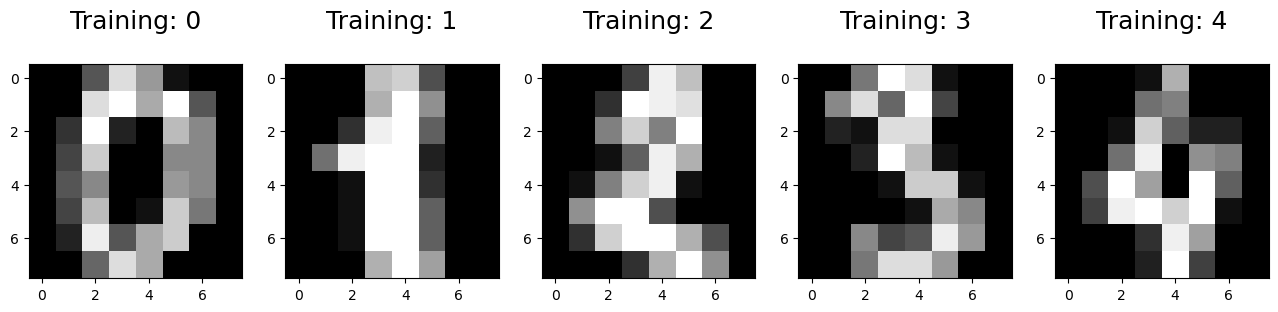

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(16,9))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 18)

In [8]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [20]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
digits.images.shape

(1797, 8, 8)

In [13]:
digits.images[0, :,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
digits.images.min(), digits.images.max()

(0.0, 16.0)

In [21]:
digits.data.shape, digits.target.shape


((1797, 64), (1797,))

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.25, random_state=0)

In [23]:
from  sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()

In [25]:
log_reg

LogisticRegression()

In [26]:
log_reg.fit(x_train, y_train)

/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# weights of our model
(log_reg.coef_).shape

(10, 64)

In [37]:
prediction = log_reg.predict(x_test)

In [34]:
#log_reg.predict(x_test), y_test 



### Using sklearn

https://www.kaggle.com/code/binaryjoker/logistic-regression-on-digit-dataset

In [1]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [2]:
log_reg

LogisticRegression()

In [ ]:
log_reg.fit(x_train,y_train)

In [ ]:
log_reg.predict(x_test[0:10])

In [ ]:
# make prediction on entire data
prediction = log_reg.predict(x_test)

In [35]:
score = log_reg.score(x_test,y_test)
print(score)

0.9511111111111111


In [38]:
from sklearn import metrics 

cm = metrics.confusion_matrix(y_test, prediction)

Text(0.5, 1.0, 'Accuracy Score : 0.9511111111111111')

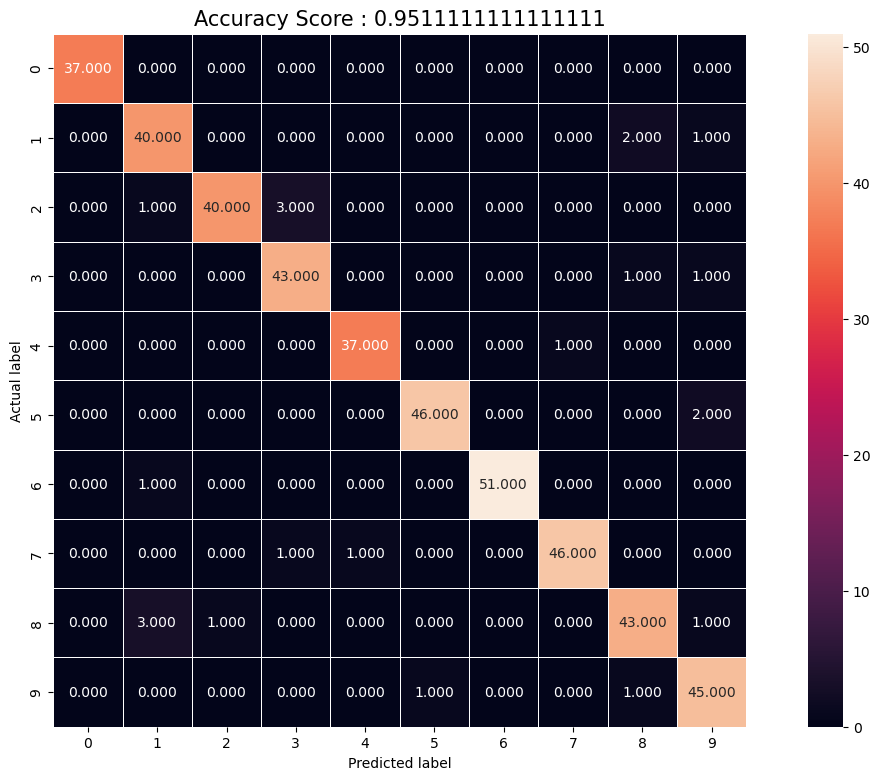

In [39]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size = 15)

# Logistic regression from scratch 

In [ ]:
min(x_train[0]), max(x_train[0]), x_train.shape

Linear regression:
$z^{(i)} = w^T x^{(i)} + b \tag{1}$

Activation function sigmoid:
$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$

Log-loss function:
$$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

Cost function
$$ J(w, b) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$

Key steps: 

    - Initialize the parameters of the model
    - Train the parameters for the model by minimizing the cost  
    - Predict on the test set with trained parameters
    - Evaluate the result

In [40]:
def sigmoid(z):
    s = 1/(1+np.exp(z)**(-1))
    return s

In [41]:
#check 
sigmoid([0, 1, 2, 3, 4])

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379])

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    """
    w = np.zeros((dim, 1), dtype = float) # for coefficients
    b = int(0) # for bias
   
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
w, b = initialize_with_zeros(2)
w, b

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.


Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

# K-Nearest Neighbor(KNN) Algorithm

KNN is a supervised machine learning algorithm used for both classification and regression, but it is most commonly used for classification.

It is an instance-based or lazy learning algorithm, meaning it does not "train" a model in the traditional sense. Instead, it stores the entire dataset and makes predictions based on the proximity of new data points to existing data points.

**How it works:**
- When we want to classify a new data point, KNN looks at the K closest data points (neighbors) in the training data.
- The "closeness" is measured using a distance metric, like Euclidean distance.
- It counts how many of those neighbors belong to each class.
- The new point is assigned to the majority class among its K nearest neighbors.


**Steps of KNN:**

- Choose the number K (e.g., K=3 or K=5).
- Calculate the distance between the new point and all points in the training data.
- Select the K points with the smallest distances (the nearest neighbors).
- Assign the class label based on the most common class among these K neighbors.



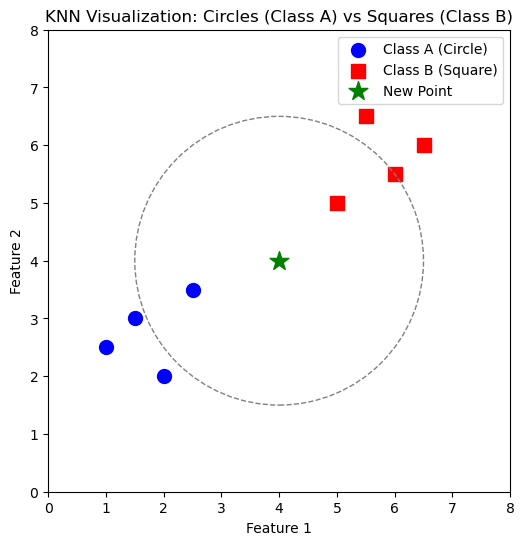

In [5]:
# Define two classes
class_a = np.array([[2, 2], [1.5, 3], [2.5, 3.5], [1, 2.5]])
class_b = np.array([[5, 5], [6, 5.5], [5.5, 6.5], [6.5, 6]])

# Define a new point to classify
new_point = np.array([[4, 4]])

# Plotting
plt.figure(figsize=(6, 6))

# Class A - circles
plt.scatter(class_a[:, 0], class_a[:, 1], c='blue', marker='o', s=100, label='Class A (Circle)')

# Class B - squares
plt.scatter(class_b[:, 0], class_b[:, 1], c='red', marker='s', s=100, label='Class B (Square)')

# New point - star
plt.scatter(new_point[0, 0], new_point[0, 1], c='green', marker='*', s=200, label='New Point')

# Dashed circle to show the neighborhood
circle = plt.Circle((new_point[0, 0], new_point[0, 1]), 2.5, color='gray', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# Labels and styling
plt.legend()
plt.grid(False)
plt.title('KNN Visualization: Circles (Class A) vs Squares (Class B)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.gca().set_aspect('equal', adjustable='box')



In [21]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic 2D data
X, y = make_classification(n_samples=30, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, random_state=42)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x74edc36cb5c0>>
Traceback (most recent call last):
  File "/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3952, in atexit_operations
    self._atexit_once()
  File "/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3935, in _atexit_once
    self.history_manager.end_session()
  File "/home/dzyga/miniconda3/envs/MyEnv/lib/python3.12/site-packages/IPython/core/history.py", line 594, in end_session
    self.db.execute(
sqlite3.OperationalError: attempt to write a readonly database


In [17]:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# Create a mesh to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

In [19]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

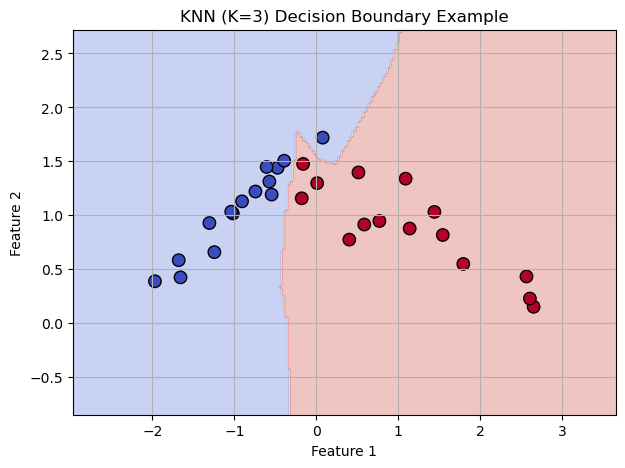

In [20]:
# Plot
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm, s=80)
plt.title('KNN (K=3) Decision Boundary Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Support vector machine: SVM 

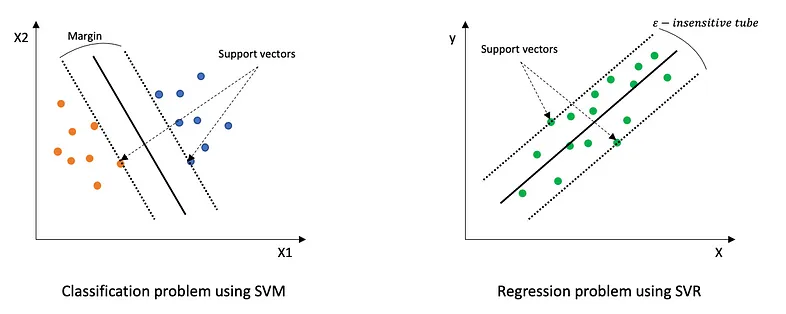

https://medium.com/@niousha.rf/support-vector-regressor-theory-and-coding-exercise-in-python-ca6a7dfda927

In [ ]:
import pandas as pd

df = pd.read_csv('data/Student_Marks.csv')
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

# train and test datasets are sorted for plotting purpose 
train = train.sort_values('time_study')
test = test.sort_values('time_study')

X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']


In [ ]:
from sklearn.preprocessing import StandardScaler

### When using StandardScaler(), fit() method expects a 2D array-like input
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# X_train[:10], X_train_scaled[:10]

In [ ]:
from sklearn.svm import SVR

svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

In [ ]:
#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

In [ ]:
from sklearn import metrics

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')

In [ ]:
#### Test dataset - plot ####
y_test_pred = svr_lin.predict(X_test_scaled)
min_x = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')

https://medium.com/@nandiniverma78988/an-introduction-to-support-vector-regression-svr-in-machine-learning-681d541a829a

In [ ]:


# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Fit the SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X, y)

# Predict on new data points
X_test = np.linspace(0, 5, 100)[:, np.newaxis]
y_pred = svr_rbf.predict(X_test)

# Plot the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', lw=2, label='RBF model')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()